In [ ]:

#Library Python untuk image processing
from scipy import fftpack
from skimage.measure import block_reduce
from scipy.misc import imresize
import numpy as np
import imageio
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

import io
import scipy.ndimage
from scipy.ndimage import rotate
from scipy.misc import face


#pillow package

def open_image(path):
    newImage = Image.open(path)
    return newImage

def save_image(image, path):
    image.save(path, 'png')

def create_image(i, j):
    image = Image.new("RGB", (i, j), "white")
    return image

def get_pixel(image, i, j):
    width, height = image.size
    if i > width or j > height:
        return None
    
    pixel = image.getpixel((i, j))
    return pixel




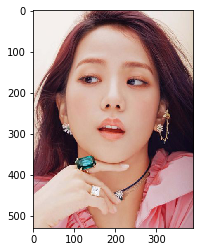

In [ ]:
#Membuka gambar dengan bahasa python

img = Image.open("jisoo1.jpg")

#open_image("jisoo1.jpg")

plt.imshow(img)
plt.show ()

img_size = img.size

#save gambar blackpink
img.save("jisooblackpink.jpg")
#output berupa foto member blackpink

<PIL.Image.Image image mode=RGB size=390x530 at 0x1B5B3F9B5C0>


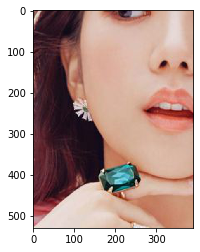

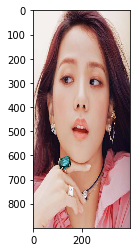

In [ ]:
#Soal No 4 Bagian Zoom in

def proc_zoomin (img, x, y, zoom):
    w, h = img.size
    zoin = zoom * 2
    img = img.crop((x - w / zoin, y - h / zoin, x + w / zoin, y + h / zoin))
    
    return img.resize((w, h), Image.LANCZOS)

zoom_in = proc_zoomin(img, 120, 300, 2)

print (zoom_in)
plt.imshow(zoom_in)
plt.show()

#Soal No 4 Bagian Zoom out
#Masukkan value baru untuk dilakukan zoomout

newid = 400 #new width misal 400
newhei = 900 #new height misal 900

new_heiht = newid * img_size[0] // img_size[0]
new_width = newhei * img_size[1] // img_size[1]

img = img.resize((new_heiht, new_width), Image.ANTIALIAS)

plt.imshow(img)
plt.show()

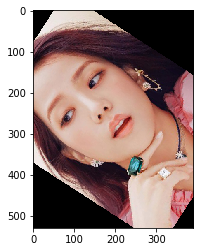

In [ ]:
# Soal No 4 Rotasi Gambar
img = Image.open("jisoo1.jpg")
img = img.rotate(57)
plt.imshow(img)
plt.show()

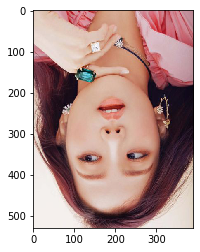

In [ ]:
#Soal No 4 Flip Gambar
img = Image.open("jisoo1.jpg")
img = ImageOps.flip(img)
plt.imshow(img)
plt.show()

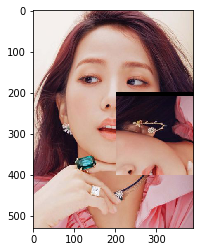

In [ ]:
#soal No 4 Cut dan Paste
img = Image.open("jisoo1.jpg")

#pilih region yang mau di cut atau crop
box = (200, 200, 400, 400)
region = img.crop(box)

#letak posisi yang mau di paste
region = region.transpose(Image.ROTATE_90)
img.paste(region, box)

plt.imshow(img)
plt.show()

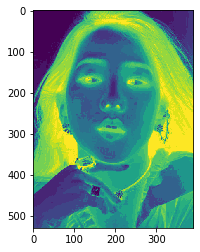

In [ ]:
#Soal No 2 Kuatisasi
img = Image.open("jisoo1.jpg")

imgK = img.quantize(20)

plt.imshow(imgK)
plt.show()

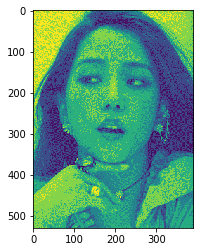

In [ ]:
#Soal No2 Dithering
img = Image.open("jisoo1.jpg")
imgdit = img.convert(mode="P", colors=20)
intermediate = img.copy()

dithering = intermediate._new(intermediate.im.convert('P', Image.FLOYDSTEINBERG))

plt.imshow(dithering)
plt.show()

In [ ]:
#Soal No2 Halftoning

#sebelum ke halftoning gambar berupa RGB terlebih dahulu
img = Image.open("jisoo1.jpg")

#Gambar selanjutnya diumbah ke CMYK
cmyk = img.convert('CMYK').split()
c = cmyk[0].convert('1').convert('L')
m = cmyk[1].convert('1').convert('L')
y = cmyk[2].convert('1').convert('L')
k = cmyk[3].convert('1').convert('L')

#masukkan ke 4 hasil convert nilai ke var halftoned
img_halftone = Image.merge('CMYK', [c, m, y, k])

In [ ]:
#soal No 3 RGB
img = Image.open("jisoo1.jpg")
img_rgb = img.convert('RGB')

img_rgb.show()
#tidak terlalu banyak perubahan karena gambar sebelumnya dalam bentuk RGB

In [ ]:
#Soal No 3 gray atau HSV
img = Image.open("jisoo1.jpg")
gray = img.convert("LA")
gray.show()

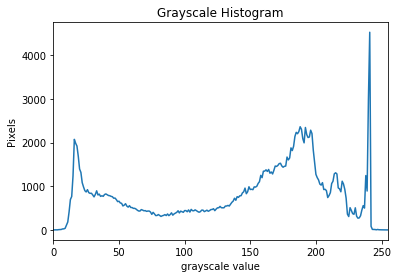

In [ ]:
#Soal No5 Menampilkan Histogram grayscale

histogram = gray.histogram()

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("Pixels")
plt.xlim([0, 255])

plt.plot(histogram)
plt.show()


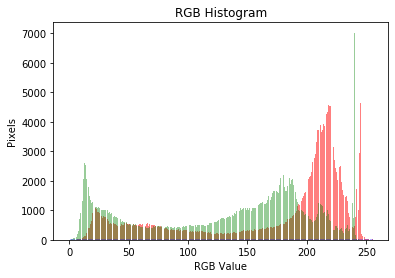

In [ ]:
#Soal No5 Menampilkan Histogram RGB

rgb = img.histogram()

#plt.figure()
plt.title("RGB Histogram")
plt.xlabel("RGB Value")
plt.ylabel("Pixels")
#plt.xlim([0, 255])
#plt.plot(rgb)

plt.bar(range(256), rgb[:256], color = 'r', alpha = 0.5)
plt.bar(range(256), rgb[256:2*256], color = 'g', alpha = 0.4)
plt.bar(range(256), rgb[2*256], color = 'b', alpha = 0.3)

plt.show()